Reading classics [Python Machine Learning 3rd Edition](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch14/ch14_part3.ipynb)

In [1]:
from IPython.display import display,HTML
def dhtml(str):
    display(HTML("""<style>
    @import 'https://fonts.googleapis.com/css?family=Orbitron&effect=3d';      
    </style><h1 class='font-effect-3d' 
    style='font-family:Orbitron; color:#ffee11; font-size:25px;'>
    %s</h1>"""%str))
def phtml(str):
    display(HTML("""<style>
    @import 'https://fonts.googleapis.com/css?family=Smokum&effect=3d-float';      
    </style><h1 class='font-effect-3d-float' 
    style='font-family:Smokum; color:#11ff11; font-size:25px;'>
    %s</h1>"""%str))

In [2]:
dhtml('Code Modules & Functions')

In [3]:
import warnings; warnings.filterwarnings('ignore')
import tensorflow as tf,pylab as pl
import pandas as pd,numpy as np,seaborn as sb
import tensorflow.keras.utils as tku
import tensorflow.image as timg
import tensorflow_datasets as tfds
from tensorflow.data import Dataset as tds
import sklearn.model_selection as sms
from IPython.core.magic import register_line_magic

In [4]:
def preprocess(item):
    image,label=item['image'],item['label']
    image=timg.convert_image_dtype(image,tf.float32)
    image=tf.reshape(image,(-1,))
    return {'image-pixels':image},label[...,tf.newaxis]
def train_input_fn(buffer_size,batch_size):
    datasets=tfds.load(name='mnist')
    mnist_train=datasets['train']
    ds=mnist_train.map(preprocess)
    ds=ds.shuffle(buffer_size)
    ds=ds.batch(batch_size)
    return ds.repeat()
def test_input_fn(batch_size):
    datasets=tfds.load(name='mnist')
    mnist_test=datasets['test']
    ds=mnist_test.map(preprocess)
    ds=ds.batch(batch_size)
    return ds

In [5]:
@register_line_magic
def display_predict(n):
    n=int(n)
    fig=pl.figure(figsize=(10,8))
    randch=np.random.choice(batch_size,size=n,
                            replace=False)
    for i,idx in enumerate(randch):
        ax=fig.add_subplot(3,n//3,i+1,
                           xticks=[],yticks=[])
        ax.imshow(bx_test[idx].reshape(img_size,img_size),
                  cmap='summer')
        pred_idx=py_test[idx]; true_idx=by_test[idx]
        ax.set_title("{} \n({})".format(pred_idx,true_idx),
                     color=("#11ff11" if pred_idx==true_idx 
                            else "#ffee11"))
    pl.show()

In [6]:
dhtml('Data Processing')

In [7]:
buffer_size=1000; batch_size=64
img_size=28; num_epochs=20
steps_per_epoch=np.ceil(60000/batch_size)
feature_column=tf.feature_column.numeric_column(
    key='image-pixels',shape=(img_size*img_size))

In [8]:
ds_test=test_input_fn(batch_size)
bx_test,by_test=[],[]
batch=next(iter(ds_test))
for j in range(batch_size):
    by_test.append(batch[1].numpy()[j][0])
    bx_test.append(batch[0]['image-pixels'].numpy()[j])



Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


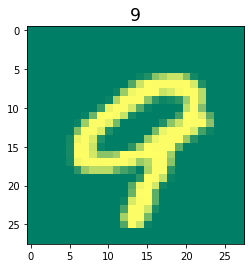

In [9]:
phtml('keys: </br>%s'%batch[0].keys())
n=np.random.randint(0,batch_size,1)[0]
img=bx_test[n].reshape(img_size,img_size)
pl.imshow(img,cmap='summer')
pl.title(by_test[n],fontdict={'fontsize':'xx-large'});

In [10]:
dhtml('DNN Classifiers')

In [11]:
dnn_clf=tf.estimator.DNNClassifier(
    feature_columns=[feature_column],
    hidden_units=[96,32],n_classes=10,
    model_dir='models/mnist-dnn/');

In [12]:
dnn_clf.train(input_fn=lambda:train_input_fn(buffer_size,batch_size),
              steps=num_epochs*steps_per_epoch);

In [13]:
test_result=dnn_clf\
.evaluate(input_fn=lambda:test_input_fn(batch_size))
phtml(test_result)

In [14]:
dhtml('Predictions')

In [15]:
y_test_pred=dnn_clf\
.predict(input_fn=lambda:test_input_fn(batch_size))
py_test=[]
for i in range(10000):
    py_test.append(next(iter(y_test_pred))['class_ids'][0])

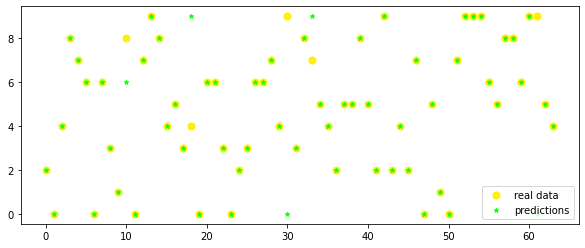

In [16]:
pl.figure(figsize=(10,4))
pl.scatter(range(batch_size),by_test,s=50,
           label='real data',c="#ffee11")
pl.scatter(range(batch_size),
           py_test[:batch_size],
           s=20,marker='*',
           label='predictions',c='#11ff11')
pl.legend();

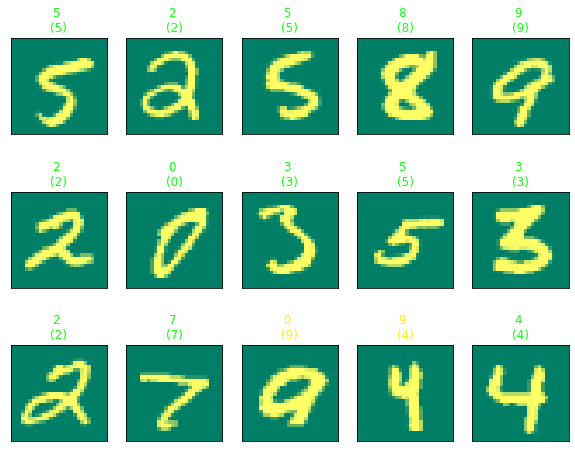

In [17]:
%display_predict 15